# <p style="background-color:green;font-family:newtimeroman;font-size:100%;color:white;text-align:center;border-radius:20px 20px;"><b>Soldier Race Project</b></p>

### Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Bagging Methods, Boosting Methods*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Import Modules, Load Data and Data Review

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (9,5)
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

# Exploratory Data Analysis and Visualization

In [5]:
male = pd.read_csv('https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr', encoding='latin-1')
female = pd.read_csv('https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq', encoding='latin-1')

In [6]:
male = male.drop(columns='subjectid')

In [7]:
male.shape

(4082, 107)

In [8]:

female = female.drop(columns='SubjectId')

In [9]:
female.shape

(1986, 107)

In [10]:
df = pd.concat([male, female], axis=0).reset_index(drop=True)

In [11]:
df.shape

(6068, 107)

In [12]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 107 columns):
 #    Column                          Non-Null Count  Dtype 
---   ------                          --------------  ----- 
 0    abdominalextensiondepthsitting  6068 non-null   int64 
 1    acromialheight                  6068 non-null   int64 
 2    acromionradialelength           6068 non-null   int64 
 3    anklecircumference              6068 non-null   int64 
 4    axillaheight                    6068 non-null   int64 
 5    balloffootcircumference         6068 non-null   int64 
 6    balloffootlength                6068 non-null   int64 
 7    biacromialbreadth               6068 non-null   int64 
 8    bicepscircumferenceflexed       6068 non-null   int64 
 9    bicristalbreadth                6068 non-null   int64 
 10   bideltoidbreadth                6068 non-null   int64 
 11   bimalleolarbreadth              6068 non-null   int64 
 12   bitragionchinarc                

In [13]:
df[df.duplicated]

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference


In [14]:
df.isnull().sum()

abdominalextensiondepthsitting       0
acromialheight                       0
acromionradialelength                0
anklecircumference                   0
axillaheight                         0
balloffootcircumference              0
balloffootlength                     0
biacromialbreadth                    0
bicepscircumferenceflexed            0
bicristalbreadth                     0
bideltoidbreadth                     0
bimalleolarbreadth                   0
bitragionchinarc                     0
bitragionsubmandibulararc            0
bizygomaticbreadth                   0
buttockcircumference                 0
buttockdepth                         0
buttockheight                        0
buttockkneelength                    0
buttockpopliteallength               0
calfcircumference                    0
cervicaleheight                      0
chestbreadth                         0
chestcircumference                   0
chestdepth                           0
chestheight              

In [15]:
df = df.drop(['SubjectNumericRace','Ethnicity', 'Heightin', 'Weightlbs','Date', 'Installation','Component', 'Branch', 'PrimaryMOS'], axis=1)

In [16]:
df['SubjectsBirthLocation'].unique()

array(['North Dakota', 'New York', 'Wisconsin', 'North Carolina',
       'Kentucky', 'Mississippi', 'Romania', 'Arkansas', 'Maryland',
       'Arizona', 'South Carolina', 'California', 'Washington',
       'Virginia', 'Texas', 'Illinois', 'Puerto Rico', 'Georgia',
       'Colombia', 'El Salvador', 'Michigan', 'Missouri', 'Philippines',
       'Florida', 'Pennsylvania', 'West Virginia', 'Nebraska', 'Indiana',
       'Montana', 'Colorado', 'Mexico', 'Minnesota', 'Iowa', 'Peru',
       'Oklahoma', 'Massachusetts', 'District of Columbia', 'Ohio',
       'Louisiana', 'Oregon', 'Tennessee', 'Alaska', 'Connecticut',
       'Guam', 'Vietnam', 'Hawaii', 'Netherlands', 'Taiwan', 'Idaho',
       'New Mexico', 'Belgium', 'Japan', 'Maine', 'New Jersey', 'Morocco',
       'Alabama', 'Canada', 'Germany', 'Kansas', 'South Korea',
       'British Virgin Islands', 'Utah', 'US Virgin Islands', 'Nevada',
       'Guyana', 'Delaware', 'Jamaica', 'Cameroon', 'New Hampshire',
       'Nicaragua', 'United Kingd

In [17]:
us_states = ["Alabama", "Alaska", "Arizona", "Arkansas", "California",
              "Colorado", "Connecticut", "Delaware", "Florida", "Georgia",
              "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas",
              "Kentucky", "Louisiana", "Maine", "Maryland", "Massachusetts",
              "Michigan", "Minnesota", "Mississippi", "Missouri", "Montana",
              "Nebraska", "Nevada", "New Hampshire", "New Jersey",
              "New Mexico", "New York", "North Carolina", "North Dakota",
              "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island",
              "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah",
              "Vermont", "Virginia", "Washington", "West Virginia",
              "Wisconsin", "Wyoming"]
us_lower = []
for i in us_states:
    us_lower.append(i.lower())
#us_lower

df['SubjectsBirthLocation'] = df['SubjectsBirthLocation'].str.lower()

df['SubjectsBirthLocation'] = df['SubjectsBirthLocation'].isin(us_lower)

# 1'e dönüştürme
df['SubjectsBirthLocation'] = df['SubjectsBirthLocation'].astype(int)




In [18]:
df['SubjectsBirthLocation'].unique()

array([1, 0])

In [19]:
df.groupby('SubjectsBirthLocation')['DODRace'].count()

SubjectsBirthLocation
0     681
1    5387
Name: DODRace, dtype: int64

In [20]:
df['DODRace'].value_counts()

DODRace
1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: count, dtype: int64

In [21]:
df = df[df['DODRace'] < 4]

In [22]:
df['DODRace'].value_counts()

DODRace
1    3792
2    1298
3     679
Name: count, dtype: int64

In [23]:
df.head()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,DODRace,Age,WritingPreference
0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,1,1,41,Right hand
1,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,1,1,35,Left hand
2,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,1,2,42,Left hand
3,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,1,1,31,Right hand
4,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458,135,398,430,1572,132,523,302,1231,400,180,919,995,641,2035,1914,1596,1292,672,194,962,584,122,1090,1679,467,303,868,214,379,1245,946,188,954,Male,1,2,21,Right hand


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5769 entries, 0 to 6067
Data columns (total 98 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   abdominalextensiondepthsitting  5769 non-null   int64 
 1   acromialheight                  5769 non-null   int64 
 2   acromionradialelength           5769 non-null   int64 
 3   anklecircumference              5769 non-null   int64 
 4   axillaheight                    5769 non-null   int64 
 5   balloffootcircumference         5769 non-null   int64 
 6   balloffootlength                5769 non-null   int64 
 7   biacromialbreadth               5769 non-null   int64 
 8   bicepscircumferenceflexed       5769 non-null   int64 
 9   bicristalbreadth                5769 non-null   int64 
 10  bideltoidbreadth                5769 non-null   int64 
 11  bimalleolarbreadth              5769 non-null   int64 
 12  bitragionchinarc                5769 non-null   int64

In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
abdominalextensiondepthsitting,5769.0,247.254290,37.457748,155.0,220.0,243.0,272.0,451.0
acromialheight,5769.0,1408.630265,78.303123,1146.0,1353.0,1412.0,1464.0,1683.0
acromionradialelength,5769.0,328.071590,20.444554,249.0,314.0,328.0,342.0,393.0
anklecircumference,5769.0,225.201768,15.965783,156.0,214.0,225.0,235.0,293.0
axillaheight,5769.0,1301.902583,71.260913,1062.0,1252.0,1304.0,1351.0,1553.0
balloffootcircumference,5769.0,244.408043,16.803556,186.0,233.0,245.0,256.0,306.0
balloffootlength,5769.0,195.118911,13.379000,151.0,186.0,196.0,205.0,245.0
biacromialbreadth,5769.0,399.706015,30.124094,283.0,377.0,404.0,422.0,489.0
bicepscircumferenceflexed,5769.0,341.663027,41.270615,216.0,312.0,342.0,370.0,490.0
bicristalbreadth,5769.0,274.903449,19.239580,197.0,262.0,274.0,288.0,362.0


In [26]:
for i in df.columns:
  print('======'+i+'======')
  print(df.groupby('DODRace')[i].sum())

======abdominalextensiondepthsitting======
DODRace
1    941738
2    317425
3    167247
Name: abdominalextensiondepthsitting, dtype: int64
======acromialheight======
DODRace
1    5385151
2    1809454
3     931783
Name: acromialheight, dtype: int64
======acromionradialelength======
DODRace
1    1250903
2     425133
3     216609
Name: acromionradialelength, dtype: int64
======anklecircumference======
DODRace
1    861686
2    286978
3    150525
Name: anklecircumference, dtype: int64
======axillaheight======
DODRace
1    4971338
2    1679603
3     859735
Name: axillaheight, dtype: int64
======balloffootcircumference======
DODRace
1    932228
2    313877
3    163885
Name: balloffootcircumference, dtype: int64
======balloffootlength======
DODRace
1    740528
2    255204
3    129909
Name: balloffootlength, dtype: int64
======biacromialbreadth======
DODRace
1    1525387
2     513158
3     267359
Name: biacromialbreadth, dtype: int64
======bicepscircumferenceflexed======
DODRace
1    1297491
2  

In [27]:
len(df.columns)

98

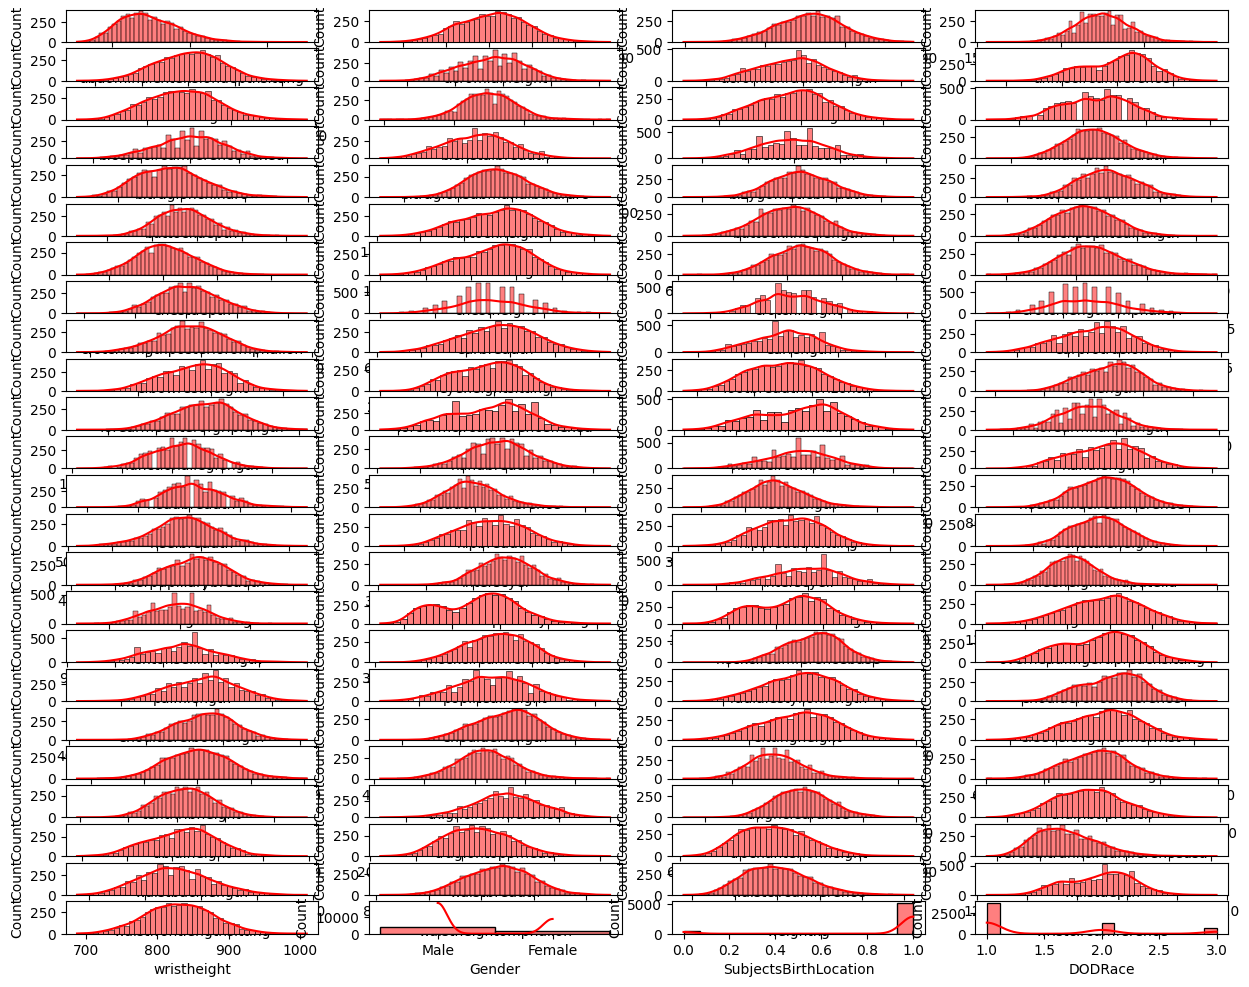

In [28]:
cols= list(df.columns)
fig, ax = plt.subplots(24,4,figsize=(15,12))
ind= 0
for i in range(24):
    for j in range(4):
        sns.histplot(df[cols[ind]], ax=ax[i,j], color = "red", kde=True)
        ind+=1
plt.tight_layout()
plt.show()

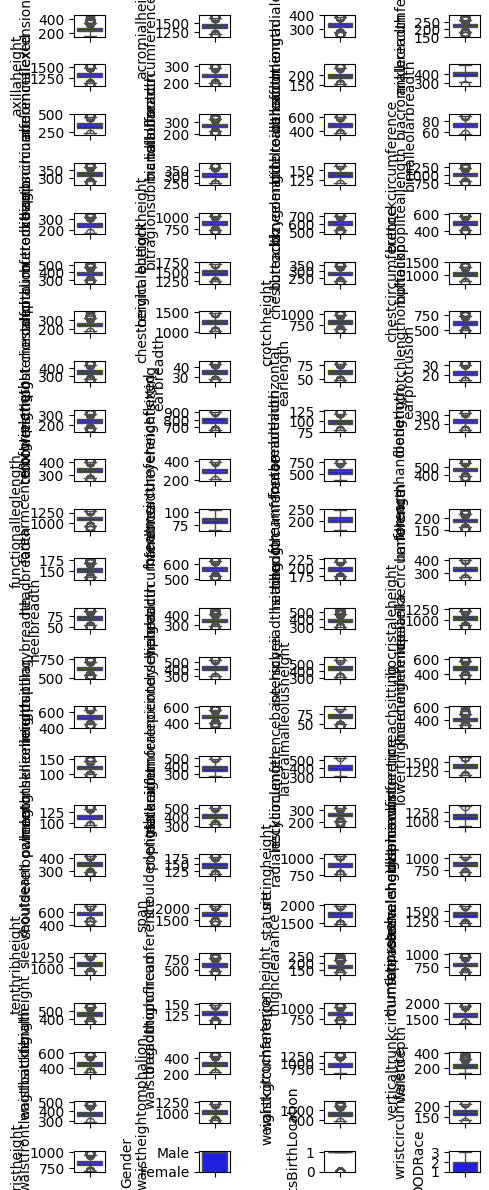

In [29]:
cols= list(df.columns)
fig, ax = plt.subplots(24,4,figsize=(5,12))
ind= 0
for i in range(24):
    for j in range(4):
        sns.boxplot(df[cols[ind]], ax=ax[i,j], color = "blue")
        ind+=1
plt.tight_layout()
plt.show()

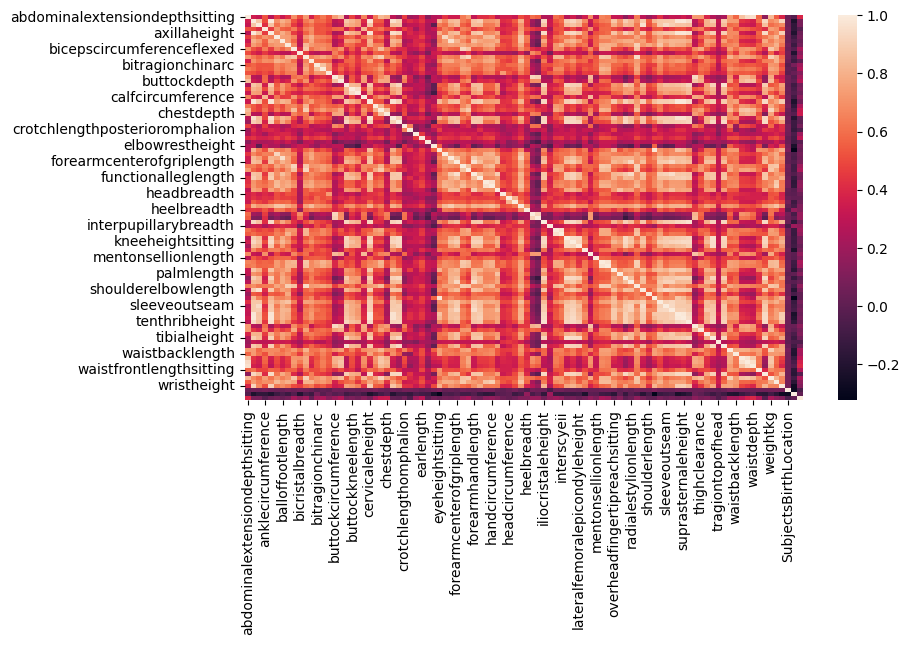

In [30]:
sns.heatmap(df.corr(numeric_only=True));

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## Determination of Dependent and Independent Variable

In [31]:
X = df.drop(columns='DODRace')
y = df['DODRace']

In [32]:
print(X)
print(y)

      abdominalextensiondepthsitting  acromialheight  acromionradialelength  anklecircumference  axillaheight  balloffootcircumference  balloffootlength  biacromialbreadth  bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight  buttockkneelength  buttockpopliteallength  calfcircumference  cervicaleheight  chestbreadth  chestcircumference  chestdepth  chestheight  crotchheight  crotchlengthomphalion  crotchlengthposterioromphalion  earbreadth  earlength  earprotrusion  elbowrestheight  eyeheightsitting  footbreadthhorizontal  footlength  forearmcenterofgriplength  forearmcircumferenceflexed  forearmforearmbreadth  forearmhandlength  functionalleglength  handbreadth  handcircumference  handlength  headbreadth  headcircumference  headlength  heelanklecircumference  heelbreadth  hipbreadth  hipbreadthsitting  iliocristaleheight  \
0                

In [33]:
cat = df.select_dtypes(object).columns
cat

Index(['Gender', 'WritingPreference'], dtype='object')

## Train Test Split

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=1)

In [36]:
print(X.shape, X_train.shape, X_test.shape)
print(y.shape, y_train.shape, y_test.shape)

(5769, 97) (5192, 97) (577, 97)
(5769,) (5192,) (577,)


## Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,  OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, average_precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate, cross_val_score, GridSearchCV

In [39]:
hot_enc = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
hot_enc

OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

In [40]:
column_trans = make_column_transformer((hot_enc, cat), remainder= StandardScaler())
column_trans

ColumnTransformer(remainder=StandardScaler(),
                  transformers=[('onehotencoder',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 Index(['Gender', 'WritingPreference'], dtype='object'))])

In [36]:
operations = [('Encoder', column_trans), ('lr', LogisticRegression(random_state=1))]
lr_pipe = Pipeline(steps=operations).fit(X_train, y_train)

In [44]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [38]:
eval_metric(lr_pipe, X_train, y_train, X_test, y_test)

Test_Set
[[363   4  12]
 [  8 121   1]
 [ 28   6  34]]
              precision    recall  f1-score   support

           1       0.91      0.96      0.93       379
           2       0.92      0.93      0.93       130
           3       0.72      0.50      0.59        68

    accuracy                           0.90       577
   macro avg       0.85      0.80      0.82       577
weighted avg       0.89      0.90      0.89       577


Train_Set
[[3289   38   86]
 [  67 1072   29]
 [ 282   52  277]]
              precision    recall  f1-score   support

           1       0.90      0.96      0.93      3413
           2       0.92      0.92      0.92      1168
           3       0.71      0.45      0.55       611

    accuracy                           0.89      5192
   macro avg       0.84      0.78      0.80      5192
weighted avg       0.88      0.89      0.89      5192



### Cross Validation for Logistic Regression

In [58]:
scores = cross_validate(lr_pipe,
                        X_train,
                        y_train,
                        scoring=["accuracy", "recall_macro", "precision_macro","f1_macro"],
                        cv=10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_accuracy            0.879046
train_accuracy           0.893383
test_recall_macro        0.756588
train_recall_macro       0.777319
test_precision_macro     0.814464
train_precision_macro    0.844818
test_f1_macro            0.776517
train_f1_macro           0.801073
dtype: float64

### GridSearchCV for Logistic Regression

In [65]:
param_grid = [
    {
        "lr__penalty" : ['l2', 'none'],
        "lr__C" : [0.01, 0.1, 1],
        "lr__class_weight": ["balanced", None],
        "lr__solver": ['sag', 'lbfgs']
    },
    {
        "lr__penalty" : ['l1', 'l2'],
        "lr__C" : [0.01, 0.1, 1],
        "lr__class_weight": ["balanced", None],
        "lr__solver": ['liblinear', 'saga']
    }
]

In [66]:
lr_grid = GridSearchCV(
    estimator=lr_pipe,
    param_grid=param_grid,
    scoring = "recall",
    n_jobs=-1,  
    cv=5).fit(X_train, y_train)

In [68]:
lr_grid.best_params_

{'lr__C': 0.01,
 'lr__class_weight': 'balanced',
 'lr__penalty': 'l2',
 'lr__solver': 'sag'}

In [70]:
lr_grid.best_estimator_

Pipeline(steps=[('Encoder',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Gender', 'WritingPreference'], dtype='object'))])),
                ('lr',
                 LogisticRegression(C=0.01, class_weight='balanced',
                                    random_state=1, solver='sag'))])

In [71]:
operations = [('Encoder', column_trans), ('lr', LogisticRegression(C=0.01, class_weight='balanced', random_state=1,
                   solver='sag'))]
lr_pipe = Pipeline(steps=operations).fit(X_train, y_train)

In [72]:
eval_metric(lr_pipe, X_train, y_train, X_test, y_test)

Test_Set
[[317  13  49]
 [  3 120   7]
 [ 10   5  53]]
              precision    recall  f1-score   support

           1       0.96      0.84      0.89       379
           2       0.87      0.92      0.90       130
           3       0.49      0.78      0.60        68

    accuracy                           0.85       577
   macro avg       0.77      0.85      0.80       577
weighted avg       0.88      0.85      0.86       577


Train_Set
[[2828   78  507]
 [  36 1054   78]
 [ 118   45  448]]
              precision    recall  f1-score   support

           1       0.95      0.83      0.88      3413
           2       0.90      0.90      0.90      1168
           3       0.43      0.73      0.55       611

    accuracy                           0.83      5192
   macro avg       0.76      0.82      0.78      5192
weighted avg       0.88      0.83      0.85      5192



### SMOTE

In [ ]:
#pip install imbalanced-learn

In [57]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbpipeline


In [78]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat), 
                                       remainder=StandardScaler())

X_train_ohe = column_trans.fit_transform(X_train)
X_over, y_over = SMOTE().fit_resample(X_train_ohe, y_train)

In [82]:
print(X_over.shape)
print(y_over.value_counts())

(10239, 100)
DODRace
3    3413
1    3413
2    3413
Name: count, dtype: int64


In [83]:
X_under, y_under = RandomUnderSampler().fit_resample(X_train_ohe, y_train)

In [84]:
print(X_under.shape)
print(y_under.value_counts())

(1833, 100)
DODRace
1    611
2    611
3    611
Name: count, dtype: int64


## Random Forest Classifier

In [72]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
hot_enc = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
hot_enc

OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

In [74]:
column_trans = make_column_transformer((hot_enc, cat), remainder= 'passthrough')
column_trans

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 Index(['Gender', 'WritingPreference'], dtype='object'))])

In [75]:
operations = [('Encoder', column_trans), ('rf', RandomForestClassifier(random_state=1))]
rf_pipe = Pipeline(steps=operations).fit(X_train, y_train)

In [76]:
eval_metric(rf_pipe, X_train, y_train, X_test, y_test)

Test_Set
[[367   8   4]
 [ 32  97   1]
 [ 55   5   8]]
              precision    recall  f1-score   support

           1       0.81      0.97      0.88       379
           2       0.88      0.75      0.81       130
           3       0.62      0.12      0.20        68

    accuracy                           0.82       577
   macro avg       0.77      0.61      0.63       577
weighted avg       0.80      0.82      0.78       577


Train_Set
[[3413    0    0]
 [   0 1168    0]
 [   0    0  611]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      3413
           2       1.00      1.00      1.00      1168
           3       1.00      1.00      1.00       611

    accuracy                           1.00      5192
   macro avg       1.00      1.00      1.00      5192
weighted avg       1.00      1.00      1.00      5192



### Cross Validation for RF

In [47]:
scores = cross_validate(rf_pipe,
                        X_train,
                        y_train,
                        scoring=["accuracy", "recall_macro", "precision_macro","f1_macro"],
                        cv=10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_accuracy            0.819921
train_accuracy           1.000000
test_recall_macro        0.601697
train_recall_macro       1.000000
test_precision_macro     0.782175
train_precision_macro    1.000000
test_f1_macro            0.611613
train_f1_macro           1.000000
dtype: float64

### GridSearchCV for RF

In [50]:
param_grid = param_grid = {'rf__n_estimators':[200, 400, 800],
             'rf__max_features':[1, 2],
             'rf__max_depth':[4, 6],
             'rf__min_samples_split':[2, 3,4],
             'rf__min_samples_leaf': [1, 2],
             'rf__max_samples':[0.8, 1]}

rf_grid = GridSearchCV(estimator=rf_pipe, param_grid = param_grid, 
                       cv=10, scoring = "recall", return_train_score=True, n_jobs=-1).fit(X_train, y_train)

In [51]:
rf_grid.best_params_

{'rf__max_depth': 4,
 'rf__max_features': 1,
 'rf__max_samples': 0.8,
 'rf__min_samples_leaf': 1,
 'rf__min_samples_split': 2,
 'rf__n_estimators': 200}

In [77]:
operations = [('Encoder', column_trans), ('rf', RandomForestClassifier(max_depth = 4,
                                                                        max_features = 1,
                                                                        max_samples = 0.8,
                                                                        min_samples_leaf = 1,
                                                                        min_samples_split =2,
                                                                        n_estimators = 200,
                                                                        random_state=1))]
rf_pipe = Pipeline(steps=operations).fit(X_train, y_train)

In [78]:
eval_metric(rf_pipe, X_train, y_train, X_test, y_test)

Test_Set
[[379   0   0]
 [130   0   0]
 [ 68   0   0]]
              precision    recall  f1-score   support

           1       0.66      1.00      0.79       379
           2       0.00      0.00      0.00       130
           3       0.00      0.00      0.00        68

    accuracy                           0.66       577
   macro avg       0.22      0.33      0.26       577
weighted avg       0.43      0.66      0.52       577


Train_Set
[[3413    0    0]
 [1166    2    0]
 [ 611    0    0]]
              precision    recall  f1-score   support

           1       0.66      1.00      0.79      3413
           2       1.00      0.00      0.00      1168
           3       0.00      0.00      0.00       611

    accuracy                           0.66      5192
   macro avg       0.55      0.33      0.27      5192
weighted avg       0.66      0.66      0.52      5192



## AdaBoosting Classifier

In [67]:
from sklearn.ensemble import AdaBoostClassifier

In [68]:
hot_enc = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
hot_enc

OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

In [69]:
column_trans = make_column_transformer((hot_enc, cat), remainder= 'passthrough')
column_trans

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 Index(['Gender', 'WritingPreference'], dtype='object'))])

In [70]:
operations = [('Encoder', column_trans), ('ada', AdaBoostClassifier(random_state=1))]
ada_pipe = Pipeline(steps=operations).fit(X_train, y_train)

In [71]:
eval_metric(ada_pipe, X_train, y_train, X_test, y_test)

Test_Set
[[355  13  11]
 [ 18 109   3]
 [ 41   9  18]]
              precision    recall  f1-score   support

           1       0.86      0.94      0.90       379
           2       0.83      0.84      0.84       130
           3       0.56      0.26      0.36        68

    accuracy                           0.84       577
   macro avg       0.75      0.68      0.70       577
weighted avg       0.82      0.84      0.82       577


Train_Set
[[3247   78   88]
 [ 181  961   26]
 [ 385   65  161]]
              precision    recall  f1-score   support

           1       0.85      0.95      0.90      3413
           2       0.87      0.82      0.85      1168
           3       0.59      0.26      0.36       611

    accuracy                           0.84      5192
   macro avg       0.77      0.68      0.70      5192
weighted avg       0.82      0.84      0.82      5192



### Cross Validation for AdaBoost Classifier

In [79]:
scores = cross_validate(ada_pipe,
                        X_train,
                        y_train,
                        scoring=["accuracy", "recall_macro", "precision_macro","f1_macro"],
                        cv=10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_accuracy            0.824739
train_accuracy           0.840438
test_recall_macro        0.654952
train_recall_macro       0.676628
test_precision_macro     0.742512
train_precision_macro    0.767847
test_f1_macro            0.677843
train_f1_macro           0.700858
dtype: float64

### GridSearchCV for AdaBoostClassifier

In [82]:
param_grid = {
    "ada__n_estimators": [50, 100, 200],
    "ada__learning_rate": [0.01, 0.1, 0.5, 1]
}

In [83]:
ada_grid = GridSearchCV(estimator=ada_pipe, param_grid = param_grid, 
                       cv=10, scoring = "recall", return_train_score=True, n_jobs=-1).fit(X_train, y_train)

In [84]:
ada_grid.best_params_

{'ada__learning_rate': 0.01, 'ada__n_estimators': 50}

In [85]:
operations = [('Encoder', column_trans), ('ada', AdaBoostClassifier(learning_rate=0.01, n_estimators=50, random_state=1))]
ada_pipe = Pipeline(steps=operations).fit(X_train, y_train)

In [86]:
eval_metric(ada_pipe, X_train, y_train, X_test, y_test)

Test_Set
[[364  15   0]
 [ 93  37   0]
 [ 63   5   0]]
              precision    recall  f1-score   support

           1       0.70      0.96      0.81       379
           2       0.65      0.28      0.40       130
           3       0.00      0.00      0.00        68

    accuracy                           0.69       577
   macro avg       0.45      0.42      0.40       577
weighted avg       0.61      0.69      0.62       577


Train_Set
[[3317   96    0]
 [ 810  358    0]
 [ 555   56    0]]
              precision    recall  f1-score   support

           1       0.71      0.97      0.82      3413
           2       0.70      0.31      0.43      1168
           3       0.00      0.00      0.00       611

    accuracy                           0.71      5192
   macro avg       0.47      0.43      0.42      5192
weighted avg       0.62      0.71      0.63      5192



## Gradient Boosting Classifier

In [87]:
from sklearn.ensemble import GradientBoostingClassifier

In [88]:
hot_enc = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
hot_enc

OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

In [89]:
column_trans = make_column_transformer((hot_enc, cat), remainder= 'passthrough')
column_trans

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 Index(['Gender', 'WritingPreference'], dtype='object'))])

In [90]:
operations = [('Encoder', column_trans), ('gbm', GradientBoostingClassifier(random_state=1))]
gbm_pipe = Pipeline(steps=operations).fit(X_train, y_train)

In [91]:
eval_metric(gbm_pipe, X_train, y_train, X_test, y_test)

Test_Set
[[364  10   5]
 [ 17 112   1]
 [ 46   4  18]]
              precision    recall  f1-score   support

           1       0.85      0.96      0.90       379
           2       0.89      0.86      0.88       130
           3       0.75      0.26      0.39        68

    accuracy                           0.86       577
   macro avg       0.83      0.70      0.72       577
weighted avg       0.85      0.86      0.84       577


Train_Set
[[3382   14   17]
 [  98 1060   10]
 [ 294   27  290]]
              precision    recall  f1-score   support

           1       0.90      0.99      0.94      3413
           2       0.96      0.91      0.93      1168
           3       0.91      0.47      0.62       611

    accuracy                           0.91      5192
   macro avg       0.92      0.79      0.83      5192
weighted avg       0.91      0.91      0.90      5192



### Cross Validation for GradientBoosting Classifier

In [92]:
scores = cross_validate(gbm_pipe,
                        X_train,
                        y_train,
                        scoring=["accuracy", "recall_macro", "precision_macro","f1_macro"],
                        cv=10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

### GridSearchCV for GradientBoosting Classifier

## XGBoost Classifier

## LightGBM Classifier

## Comparing Models

# Before the Deployment 
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

- Evaluation metrics 
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

#  SHAP

https://towardsdatascience.com/shap-explain-any-machine-learning-model-in-python-24207127cad7

# <p style="background-color:green;font-family:newtimeroman;font-size:100%;color:white;text-align:center;border-radius:20px 20px;"><b>The End</b></p>